<a href="https://colab.research.google.com/github/Aleksandr62aa/Decision_trees/blob/main/Machine_learning_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Дерево решений в задаче классификации

In [24]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
# генерация данных
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)


# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]


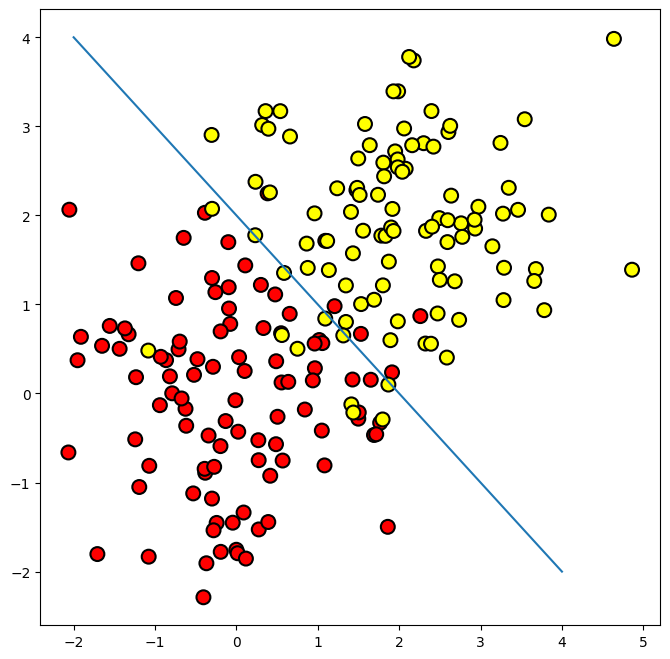

In [26]:
## визуализация данных
plt.rcParams['figure.figsize'] = (8,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));


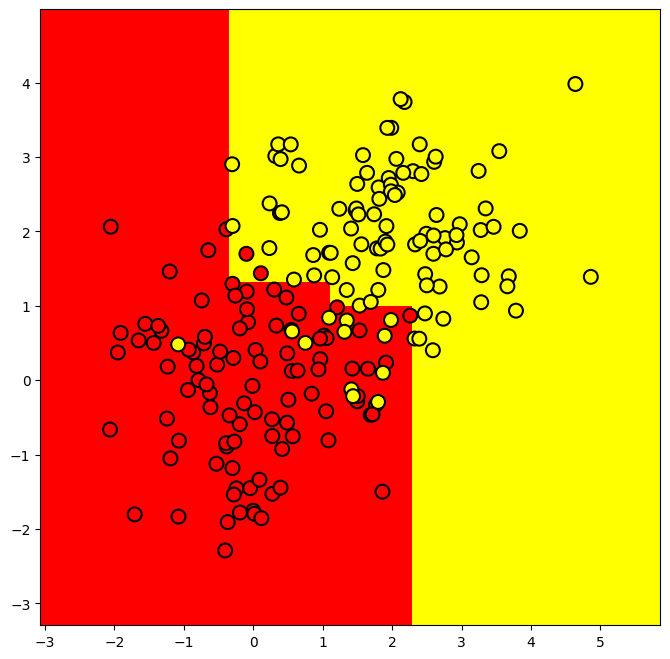

In [27]:
## Код для обучения дерева и визуализации его разделяющей границы

from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
# max_depth, ограничивающий глубину дерева
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)

predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);

In [6]:
# Дерево решений в задаче регрессии

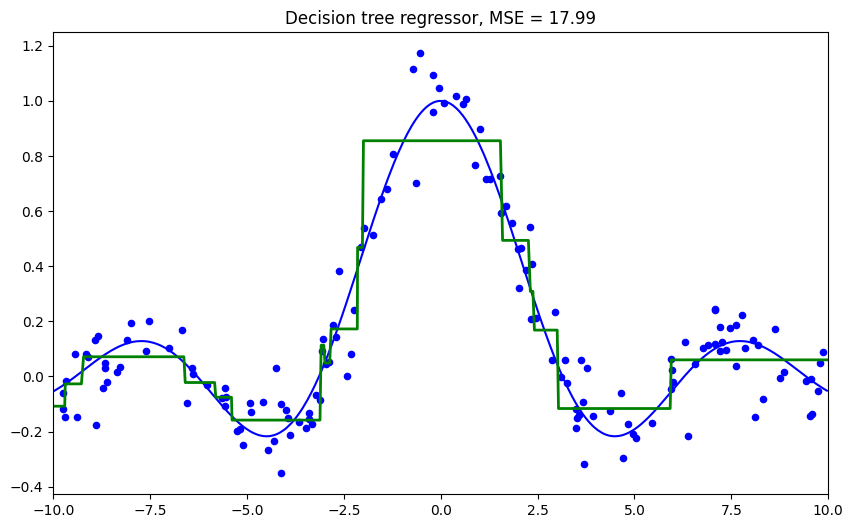

In [47]:
# генерация данных
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.sin(x)/x
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 20 - 10
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)



plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-10, 10])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

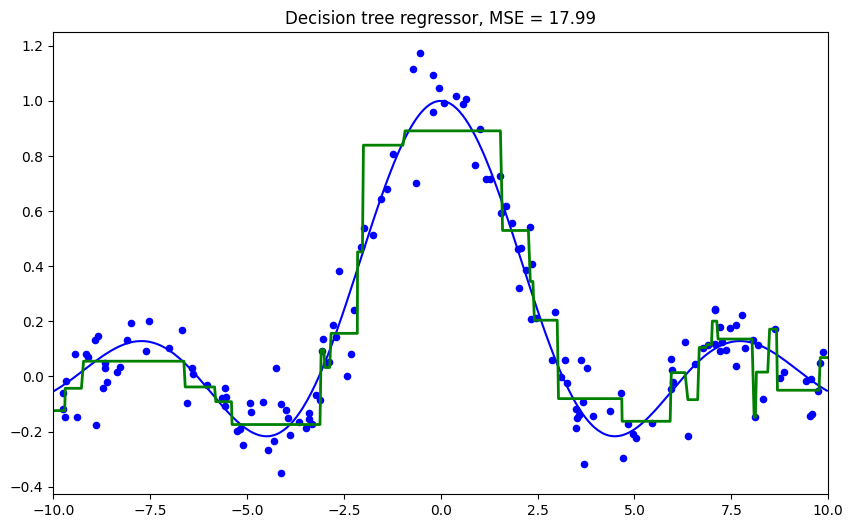

In [48]:
# бустинг последовательное обучение модели a(x) + a1(x)
reg_tree_1 = DecisionTreeRegressor(max_depth=4, random_state=17)

reg_tree_1.fit(X_train,  y_train - reg_tree.predict(X_train))
reg_tree_pred_1 = reg_tree.predict(X_test) + reg_tree_1.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred_1, "g", lw=2)
# plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-10, 10])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

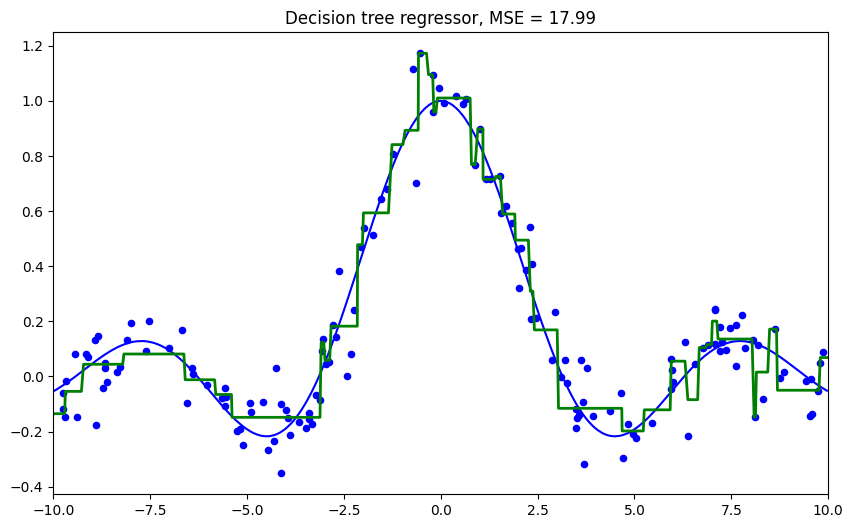

In [50]:
# бустинг последовательное обучение модели a(x) + a1(x) + a2(x)
reg_tree_2 = DecisionTreeRegressor(max_depth=4, random_state=17)

reg_tree_2.fit(X_train,  y_train - (reg_tree.predict(X_train) + reg_tree_1.predict(X_train)))
reg_tree_pred_2 = reg_tree.predict(X_test) + reg_tree_1.predict(X_test) + reg_tree_2.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred_2, "g", lw=2)
# plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-10, 10])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [ ]:
# Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST

In [51]:
# Загрузка данных и отрисовка нескольких цифр
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

print(X.shape)
print(X.reshape([1797,8,8]).shape)
print(y[1])
print (X[1,:].reshape([8,8]))

(1797, 64)
(1797, 8, 8)
1
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


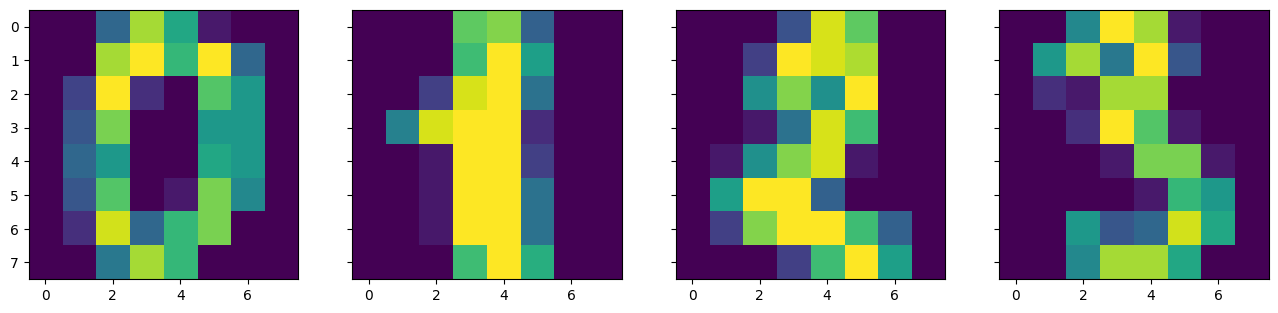

In [32]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
  axes[i].imshow(X[i,:].reshape([8,8]));

In [53]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

In [54]:
# обучение дерева и KNN
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train);

In [43]:
# прогноз и показатели качества
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred) # (0.97, 0.666)

(0.9740740740740741, 0.6666666666666666)